# Library Management Using Linked List
## Team Members:
* Anantha Krishna SK 
* Sri Ram Krishna M
* T Devi Sri Soumith
* Yogesh JK
<hr>

### Introduction and Problem Statement:
This project focuses on making a library management system based on linked lists and CSV files.<br>
<b>Key Features: </b>
* Linked list to store the each book's data (title, author, ISBN, availability)
* CSV files to store the librarian login credentials and borrower details (name and contact number)
### What is a Linked List?:
A linked list is a data structure in which the each node consists of data and a pointer pointing towards the next node.

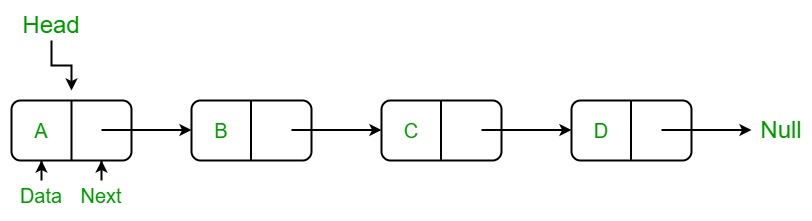
### Why use Linked List?:
* Unlike arrays, linked lists allow dynamic memory allocation.
* Addition and deletion of data is easier compared to arrays, as it requires shifting of datas which inturn results in higher time complexity.
* Whereas in Linked Lists, addition and deletion of data are easier and more efficient, especially when the position of the element is known. This is because Linked Lists use nodes that are connected through pointers, making insertion or deletion only by updating pointers rather than shifting entire blocks of data like in arrays.

In [ ]:
import csv

class Book:
    def __init__(self, title, author, isbn, available=True):
        self.title = title
        self.author = author
        self.isbn = isbn
        self.available = available

    def __str__(self):
        status = "Available" if self.available else "Borrowed"
        return f"{self.title} by {self.author} (ISBN: {self.isbn}) - {status}"


class Node:
    def __init__(self, book):
        self.book = book
        self.next = None

class _Librarian:
    def __init__(self, csv_file, borrower_file):
        self.head = None
        self.csv_file = csv_file  
        self.borrower_file = borrower_file
        self._load_books_from_csv()

    def _add_book(self, title, author, isbn):
        if self._search_by_isbn(isbn):
            print(f"Book with ISBN {isbn} already exists.")
            return

        new_book = Book(title, author, isbn)
        new_node = Node(new_book)
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next is not None:
                current = current.next
            current.next = new_node
        self._save_books_to_csv()  

    def _delete_book(self, isbn):
        isbn = str(isbn).strip()  # Ensure ISBN is treated as a string and stripped of extra spaces
        if not self.head:
            print("The library is empty. No book to delete.")
            return
        if self.head.book.isbn == isbn:
            print(f"Book '{self.head.book.title}' removed successfully!")
            self.head = self.head.next  # Update head to the next node
            self._save_books_to_csv()  
            return
        current = self.head
        while current.next and current.next.book.isbn != isbn:
            current = current.next
        if current.next:
            print(f"Book '{current.next.book.title}' removed successfully!")
            current.next = current.next.next  # Skip the node to delete it
            self._save_books_to_csv()  
        else:
            print(f"No book found with ISBN {isbn}.")

    def _mark_as_borrowed(self, isbn, borrower_name, contact_number):
        book = self._search_by_isbn(isbn)
        if book:
            if book.available:
                book.available = False
                print(f"Book '{book.title}' marked as borrowed by {borrower_name}.")
                self._save_books_to_csv()
                self._save_borrower_details(borrower_name, contact_number, isbn)
            else:
                print(f"Book '{book.title}' is already borrowed.")
            return
        print(f"No book found with ISBN {isbn}.")

    def _mark_as_returned(self, isbn):
        book = self._search_by_isbn(isbn)
        if book:
            if not book.available:
                book.available = True
                print(f"Book '{book.title}' marked as returned.")
                self._save_books_to_csv()
                self._remove_borrower_details(isbn)
            else:
                print(f"Book '{book.title}' was not borrowed.")
            return 
        print(f"No book found with ISBN {isbn}.")

    def _save_borrower_details(self, name, contact, isbn):
        try:
            with open(self.borrower_file, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([name, contact, isbn])
        except Exception as e:
            print(f"An error occurred while saving borrower details: {e}")
    
    def _remove_borrower_details(self, isbn):
        try:
            rows = []
            with open(self.borrower_file, mode='r') as file:
                reader = csv.reader(file)
                rows = [row for row in reader if row[2] != isbn]
            with open(self.borrower_file, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerows(rows)
        except Exception as e:
            print(f"An error occurred while updating borrower details: {e}")
    
    def _load_books_from_csv(self):
        try:
            with open(self.csv_file, mode='r') as file:
                reader = csv.DictReader(file)
                for row in reader:
                    title = row.get('title')
                    author = row.get('author')
                    isbn = row.get('isbn')
                    available = row.get('available', 'True').lower() == 'true'  
                    if title and author and isbn:
                        if not self._search_by_isbn(isbn):
                            self._add_book(title, author, isbn)
                            if not available:
                                pass  
                    else:
                        print(f"Skipping invalid row: {row}")
            print("Books loaded successfully from the dataset!")
        except FileNotFoundError:
            print(f"File '{self.csv_file}' not found. Starting with an empty library.")
        except Exception as e:
            print(f"An error occurred while loading the dataset: {e}")

    def _save_books_to_csv(self):
        try:
            with open(self.csv_file, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['title', 'author', 'isbn', 'available'])  
                current = self.head
                while current:
                    writer.writerow([
                        current.book.title,
                        current.book.author,
                        current.book.isbn,
                        str(current.book.available).lower()
                    ])
                    current = current.next
        except Exception as e:
            print(f"An error occurred while saving the dataset: {e}")
            
    def _search_by_isbn(self, isbn):
        isbn = str(isbn).strip()
        current = self.head
        while current:
            if str(current.book.isbn).strip() == isbn:
                return current.book
            current = current.next
        return None

class _LibrarianManagement:
    def __init__(self,csv_file):
        self.csv_file = csv_file

    def _add_librarian(self,user_id,password):
        try:
            with open(self.csv_file,mode='a',newline='') as file:
                dict = {}
                fields = ["User_ID","Password"]
                dict["User_ID"] = user_id
                dict["Password"] = password
                w = csv.DictWriter(file,fieldnames=fields)
                w.writerow(dict)
                print("Librarian details added!")
        except Exception as e:
            print(f"An error has ocurred: {e}")
    
    def _delete_librarian(self,user_id):
        try:
            updated_data = []
            with open(self.csv_file,mode='r') as file:
                r = csv.DictReader(file)
                w = csv.writer(file)
                data = []
                for row in r:
                    data.append(row)
                print(data)
                updated_data = [dict for dict in data if dict['User_ID'] != user_id]
                print(updated_data)
            with open(self.csv_file,mode='w') as file:
                fields = ["User_ID","Password"]
                w = csv.DictWriter(file,fieldnames=fields)
                w.writeheader()
                w.writerows(updated_data)
                print("Librarian details deleted!")
        
        except Exception as e:
            print(f"An error has occured: {e}")

class User:
    def __init__(self, librarian):
        self.librarian = librarian

    def search_book(self, keyword):
        current = self.librarian.head
        found = False
        while current:
            if keyword.lower() in current.book.title.lower() or keyword.lower() in current.book.author.lower():
                print(current.book)
                found = True
            current = current.next
        if not found:
            print(f"No books found matching '{keyword}'.")

    def display_books(self):
        if not self.librarian.head:
            print("The library is empty.")
            return
        current = self.librarian.head
        while current:
            print(current.book)
            current = current.next

librarian = _Librarian("C:\\Users\\jkyog\\Desktop\\data.csv", "C:\\Users\\jkyog\\Desktop\\borrower.csv")  
user = User(librarian)
librarian_manager = _LibrarianManagement("C:\\Users\\jkyog\\OneDrive\\Desktop\\college\\S2\\DSA JAVA\\Password_Manager.csv")

print("\n")

print("LIBRARY MANAGEMENT \n")

ch = input("Are you Librarian or User? (Enter 'l' for libraian and 'u' for user): ")
if ch == 'l':
    try:
        with open("Password_Manager.csv", mode='r+') as verifier:
            r = csv.DictReader(verifier)
            librarians = []
            for rows in r:
                librarians.append(rows)
        
            user_id = input("Enter User ID: ")
            password = input("Enter Password: ")

            for dict in librarians:
                if dict["User_ID"] == user_id and dict["Password"] == password:
                    while True:
                        print("What would you like to do? \n")
                        print("1. Display Books")
                        print("2. Search Book by Author/Title")
                        print("3. Search book by ISBN")
                        print("4. Add Book")
                        print("5. Delete Book")
                        print("6. Borrow a Book")
                        print("7. Return a Book")
                        print("8. Add Librarian")
                        print("9. Delete Librarian")
                        print("10. Exit")

                        ch = int(input("Enter your choice: "))
                        print("\n")

                        if ch == 1:
                            user.display_books()
    
                        elif ch == 2:
                            keyword = input("Enter a keyword (author name or book title): ")
                            user.search_book(keyword)

                        elif ch == 3:
                            isbn = int(input("Enter the book's ISBN: "))
                            print(librarian._search_by_isbn)

                        elif ch == 4:
                            title = input("Enter book title: ")
                            author = input("Enter author name")
                            isbn = int(input("Enter ISBN: "))
                            librarian._add_book(title,author,isbn)

                        elif ch == 5:
                            isbn = int(input("Enter ISBN of book to delete: "))
                            librarian._delete_book(isbn)
    
                        elif ch == 6:
                            isbn = int(input("Enter ISBN of book to borrow: "))
                            name = input("Enter borrower name: ")
                            contact = int(input("Enter borrower phone number: "))
                            librarian._mark_as_borrowed(isbn,name,contact)

                        elif ch == 7:
                            isbn = int(input("Enter ISBN of book to be returned: "))
                            librarian._mark_as_returned(isbn)

                        elif ch == 8:
                            print("Creating new Librarian login credentials")
                            user_id = input("Enter user ID: ")
                            password = input("Enter password: ")
                            librarian_manager._add_librarian(user_id,password)

                        elif ch == 9:
                            user_id = input("Enter user ID of librarian to delete: ")
                            librarian_manager._delete_librarian(user_id)

                        elif ch == 10:
                            print("Exiting. Bye!")
                            break

                        else:
                            print("Invalid input. Enter correct choice")
                            continue
    
    except Exception as e:
        print(f"There has been an error: {e}")

elif ch == 'u':
    print("Welcome to the library! \n")

    while True: 
        print("What would you like to do? \n")

        print("1. Display Books")
        print("2. Search Book by Author/Title")
        print("3. Exit")

        ch = int(input("Enter your choice: "))
        print("\n")

        if ch == 1:
            user.display_books()
    
        elif ch == 2:
            keyword = input("Enter a keyword (author name or book title): ")
            user.search_book(keyword)
    
        elif ch == 3:
            print("Exiting. Bye!")
            break

        else:
            print("Invalid input. Enter correct choice")
            continue
